# Figure  2. Collected data from the two field studies (P1-P16 in the first field study, P17-P25 in the second field study).

In [5]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from util import *

df = getPreProcessingDF('../preProcess.xlsx')

no_answer = df[df['Answer'].isna() | (df['Answer'] == '-')].groupby('PID').size().rename('NoAnswerCount')
has_answer = df[~df['Answer'].isna() & (df['Answer'] != '-')].groupby('PID').size().rename('AnswerCount')

answer_counts = pd.concat([no_answer, has_answer], axis=1).fillna(0).astype(int)
answer_counts = answer_counts.sort_index(key=lambda x: x.str.extract(r'P(\d+)')[0].astype(int))

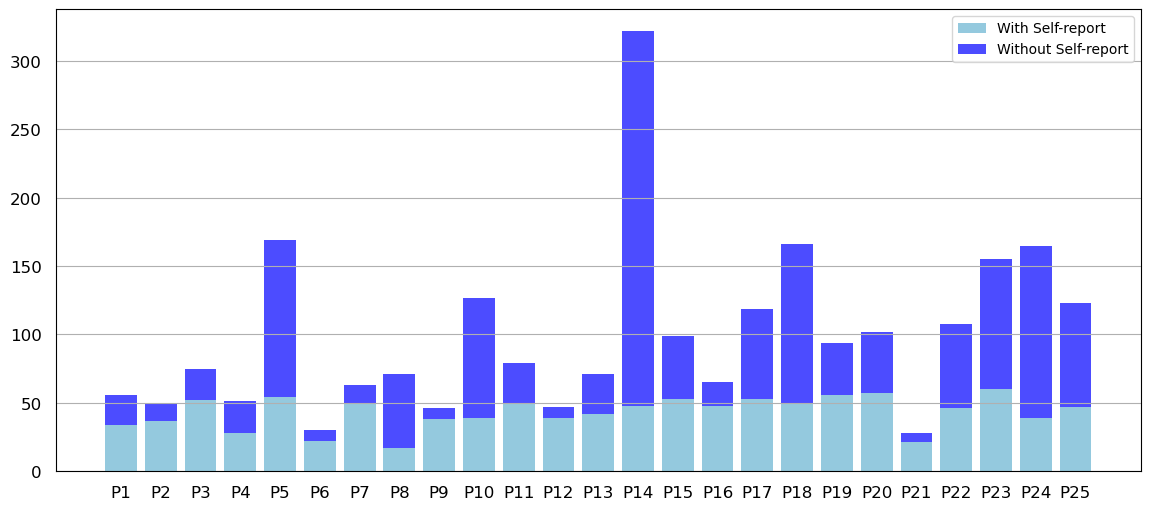

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

data_df = answer_counts.reset_index().rename(columns={
    'AnswerCount': 'answer_count',
    'NoAnswerCount': 'unanswer_count',
    'PID': 'Name'
})

plt.figure(figsize=(14, 6))

sns.barplot(x='Name', y='answer_count', data=data_df, color='skyblue', label='With Self-report')

plt.bar(data_df['Name'], data_df['unanswer_count'], bottom=data_df['answer_count'],
        color='blue', label='Without Self-report', alpha=0.7)

plt.xlabel("")
plt.ylabel("")

legend = plt.legend()
for text in legend.get_texts():
    text.set_color('black')

plt.grid(axis='y', linestyle='-')
plt.yticks(fontsize=12, color='black')
plt.xticks(fontsize=12, color='black')

plt.gca().tick_params(axis='x', length=0, pad=10)  
plt.gca().tick_params(axis='y', length=0, pad=10) 

# plt.savefig('./datacount.pdf', format='pdf', bbox_inches='tight')


# Figure 3. Reasons for video abandonment.

In [7]:
from util import *
import scikit_posthocs as sp
import scipy.stats as stats

df = getPreProcessingDF('../preProcess.xlsx')
df = df[df['Likert'] >= 1]

res = df.groupby('AbandonmentReason')['Likert'].agg(['mean', 'median', 'std', 'count'])
res.sort_values(by='mean', ascending=False)

groups = {group: data['Likert'] for group, data in df.groupby('AbandonmentReason')}
h_stat, p_value = stats.kruskal(*groups.values())
print(f"Kruskal Test Result: H: {h_stat}, p-value: {p_value}")

posthoc_results = sp.posthoc_dunn(df, val_col='Likert', group_col='AbandonmentReason', p_adjust='bonferroni')
posthoc_results

Kruskal Test Result: H: 371.2829262402751, p-value: 3.4111788383011194e-76


,Already Knew the Content,Decreased Interest,Desire Satisfired,Goal Not Achieved,Others,Undesired Content,Video Ended,Wanted to Watch Something Else
Already Knew the Content,1.000000e+00,1.598471e-01,2.203797e-03,4.222952e-03,1.000000e+00,1.000000e+00,3.526255e-07,1.000000e+00
Decreased Interest,1.598471e-01,1.000000e+00,5.606524e-38,1.000000e+00,3.025794e-06,1.000000e+00,9.878923e-42,1.489526e-09
Desire Satisfired,2.203797e-03,5.606524e-38,1.000000e+00,7.576522e-30,8.254691e-07,5.479606e-15,9.243746e-03,9.611359e-02
Goal Not Achieved,4.222952e-03,1.000000e+00,7.576522e-30,1.000000e+00,3.769795e-08,6.198086e-01,2.718407e-36,2.742730e-11
Others,1.000000e+00,3.025794e-06,8.254691e-07,3.769795e-08,1.000000e+00,2.507818e-02,5.627106e-13,1.000000e+00
Undesired Content,1.000000e+00,1.000000e+00,5.479606e-15,6.198086e-01,2.507818e-02,1.000000e+00,2.118676e-21,1.424387e-04
Video Ended,3.526255e-07,9.878923e-42,9.243746e-03,2.718407e-36,5.627106e-13,2.118676e-21,1.000000e+00,3.715174e-06
Wanted to Watch Something Else,1.000000e+00,1.489526e-09,9.611359e-02,2.742730e-11,1.000000e+00,1.424387e-04,3.715174e-06,1.000000e+00


In [8]:
remove = np.tril(np.ones(posthoc_results.shape), k=0).astype(bool)
posthoc_results[remove] = np.nan
molten_df = posthoc_results.melt(ignore_index=False).reset_index().dropna()

# Without 'Others'
molten_df = molten_df[molten_df['index'] != 'Others']
molten_df = molten_df[molten_df['variable'] != 'Others']

import cld4py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cld = cld4py.assign_letters(molten_df, 'index', 'variable', 'value')

cld

,Letters
Group,
Already Knew the Content,ae
Decreased Interest,ac
Desire Satisfired,b
Goal Not Achieved,c
Undesired Content,ac
Video Ended,d
Wanted to Watch Something Else,be


In [9]:
# Although the post-hoc results are the same, the letters were manually adjusted to match those in the paper.

cld.iloc[0] = 'ae'
cld.iloc[1] = 'de'
cld.iloc[2] = 'c'
cld.iloc[3] = 'd'
cld.iloc[4] = 'de'
cld.iloc[5] = 'b'
cld.iloc[6] = 'ac'

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_59632\1610296403.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Likert', y='AbandonmentReason', data=df, ax=ax, order=order, width=0.5, palette=palette, flierprops=flierprops)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_59632\1610296403.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(custom_labels)


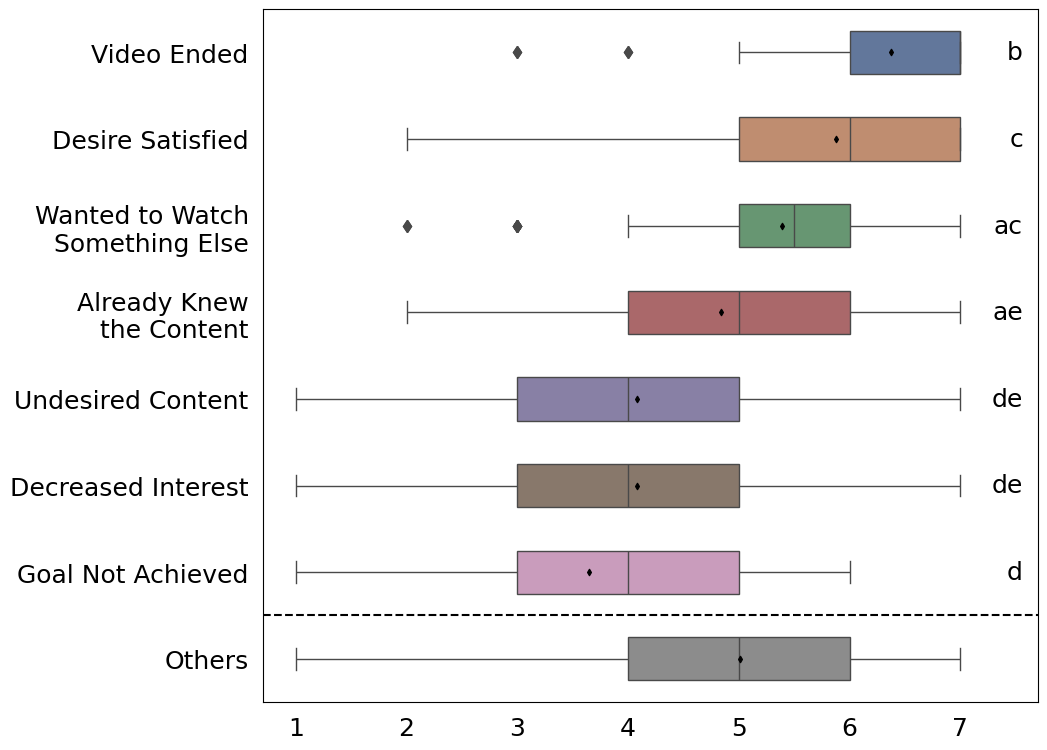

In [10]:
import matplotlib as mpl

fig, ax = plt.subplots(1, 1, figsize=(10, 9))
order = ['Video Ended', 'Desire Satisfired', 'Wanted to Watch Something Else', 'Already Knew the Content', 'Undesired Content', 'Decreased Interest', 'Goal Not Achieved', 'Others']
means = df.groupby('AbandonmentReason')['Likert'].mean()

# Plot Mean Marker
for i, category in enumerate(order):
    ax.scatter(means[category], i, color='black', s=10, zorder=5, marker='d')

flierprops = {
    'marker': 'd',      
    'color': 'red',     
    'markerfacecolor' : '#494949'
}

colors = ['#5975A4', '#CC8963', '#5F9E6E', '#B55D60', '#857AAB', '#8D7866', '#D095BF', '#8C8C8C']
palette = dict(zip(order, colors))
sns.boxplot(x='Likert', y='AbandonmentReason', data=df, ax=ax, order=order, width=0.5, palette=palette, flierprops=flierprops)

midpoint = 6.5
ax.axhline(y=midpoint, color='black', linestyle='--')

try:
    cld4py.plot_letters(cld=cld, data=df[df['AbandonmentReason'] != 'Others'], figax=ax, axis='y', plot='boxplot', pos='top', vals='Likert', group='AbandonmentReason', pad=2, c='black', fs=18, lim=6)
except:
    pass

# Sort y-axis labels by Mean
custom_labels = ['Video Ended', 'Desire Satisfied', 'Wanted to Watch\nSomething Else', 'Already Knew\nthe Content', 'Undesired Content', 'Decreased Interest', 'Goal Not Achieved', 'Others']
ax.set_yticklabels(custom_labels)
ax.set_ylabel('')
ax.set_xlabel('')

ax.tick_params(axis='x', length=0)  
ax.tick_params(axis='y', length=0)  
ax.tick_params(axis='x', labelsize=18, colors='black', pad=10) 
ax.tick_params(axis='y', labelsize=18, colors='black', pad=10) 

ax.tick_params(axis='x', length=0, pad=10)
ax.tick_params(axis='y', length=0, pad=10)

# plt.savefig('./AbandonmentReason.pdf', format='pdf', bbox_inches='tight')
